In [1]:
# Importar librerías para manipulación y análisis de datos
# -----------------------------------------------------------------------
import pandas as pd
from pandas import DataFrame
import numpy as np
pd.set_option('display.max_columns', None)  # Establece una opción de Pandas para mostrar todas las columnas de un DataFrame.

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# establece el estilo del fondo de las gráficas como "whitegrid". Las gráficas tendrán un fondo blanco con líneas de cuadrícula horizontales y verticales.
sns.set_style("whitegrid")

# cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros. 
sns.set_theme(style="dark")

# establece el estilo en Solarize_Lihgt2. 
plt.style.use('Solarize_Light2')

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

import scipy.stats as stats

# -----------------------------------------------------------------------
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import levene

## Fase 1: Exploración y Limpieza

### Exploración Inicial:
- Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes
- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas
- Une los dos conjuntos de datos de la forma más eficiente

In [2]:
df_flight = pd.read_csv("Customer Flight Activity.csv")
df_history = pd.read_csv("Customer Loyalty History.csv")

##### Exploración de Flight DF

In [3]:
df_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [4]:
df_flight.shape

(405624, 10)

In [5]:
df_flight.info() ## Year and month cambiar a date & parece que no hay nulos (verificar)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [6]:
#Verificamos q no hay nulos, y así es
df_flight.isnull().sum()/df_flight.shape[0] 

Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

In [7]:
df_flight.describe().T #Parece q son los vuelos para los año 2017 y 2018 

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [8]:
for col in df_flight.columns:
    print (f"Para la columna {col.upper()} sus valores únicos y valores son \n {df_flight[col].value_counts()}")
    print ("____________________________")

Para la columna LOYALTY NUMBER sus valores únicos y valores son 
 678205    72
989528    48
373638    48
684889    48
684881    48
          ..
428526    24
428536    24
428565    24
428590    24
999891    24
Name: Loyalty Number, Length: 16737, dtype: int64
____________________________
Para la columna YEAR sus valores únicos y valores son 
 2017    202812
2018    202812
Name: Year, dtype: int64
____________________________
Para la columna MONTH sus valores únicos y valores son 
 1     33802
9     33802
2     33802
3     33802
11    33802
4     33802
5     33802
7     33802
6     33802
8     33802
10    33802
12    33802
Name: Month, dtype: int64
____________________________
Para la columna FLIGHTS BOOKED sus valores únicos y valores son 
 0     197992
3      18228
11     15705
5      15084
7      14561
8      14357
9      14164
6      13847
2      13641
10     13363
4      12821
1      12667
13     10782
12     10382
14      7057
15      6582
16      4354
17      3899
18      2958
19 

In [9]:
# Duplicados
df_flight.duplicated().sum()

1864

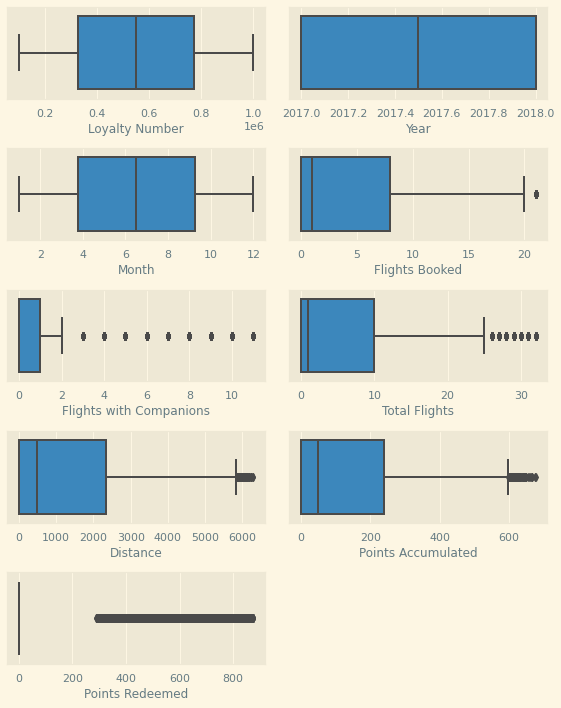

In [10]:
#Valores atípicos - Flights booked (only one), Flights w companions, total flights, distance, points accumulated, 
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (8,10)) 
axes = axes.flat

for indice, col in enumerate(df_flight.columns):
    sns.boxplot(x = col, data = df_flight, ax = axes[indice])
    plt.xlabel(col)  

plt.tight_layout()
fig.delaxes(axes[-1])
plt.show();


##### Exploración de History DF

In [11]:
df_history.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [12]:
df_history.shape

(16737, 16)

In [13]:
df_history.info() ## Enrollment year, Enrollment month, Cancellatiion year and candellation month cambiar a date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [14]:
df_history.describe().T #Salario tiene un valor negativo - ponerlo como nulo

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [15]:
#Nulos
(df_history.isnull().sum()/df_history.shape[0])*100

# Los nulos que hay son 3n 3 colulmnas numéricas
# - Salario tiene el 25% de valores nulos - Hacer una signación por vecinos (knn imputer)
# - Cancellation year and month tienen un 87% de nulos por lo que es mejor borrarlas

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [16]:
# Duplicados - No hay
df_history.duplicated().sum()

0

In [17]:
df_history["Country"].value_counts()

Canada    16737
Name: Country, dtype: int64

In [18]:
for col in df_history.columns:
    contador = df_history[col].value_counts()
    print (f"Para la columna {col.upper()} sus valores únicos y valores son \n {contador}")
    print ("____________________________")

Para la columna LOYALTY NUMBER sus valores únicos y valores son 
 480934    1
208485    1
455896    1
469781    1
533488    1
         ..
922188    1
780529    1
721438    1
761015    1
652627    1
Name: Loyalty Number, Length: 16737, dtype: int64
____________________________
Para la columna COUNTRY sus valores únicos y valores son 
 Canada    16737
Name: Country, dtype: int64
____________________________
Para la columna PROVINCE sus valores únicos y valores son 
 Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: Province, dtype: int64
____________________________
Para la columna CITY sus valores únicos y valores son 
 Toronto           3351
Vancouver         2582
Montreal          2059
Winnipeg           658
Whistl

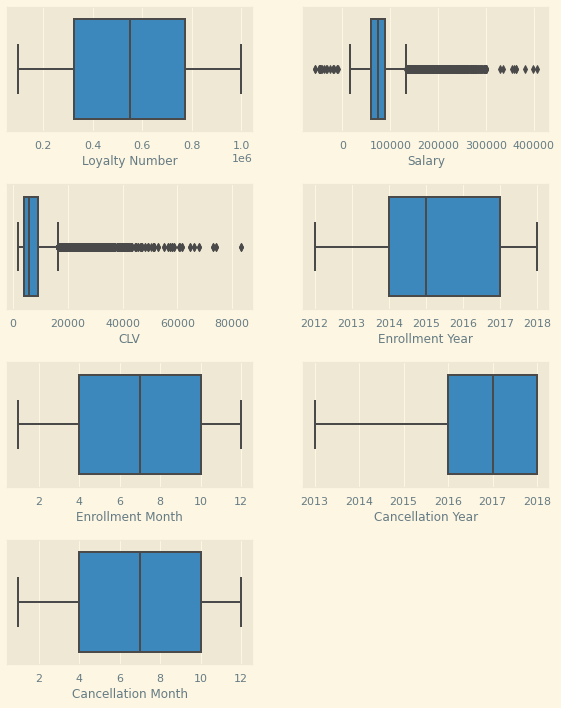

In [19]:
#Valores atípicos (sólo en numéricas) - Salary, CLV
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (8,10)) 
axes = axes.flat

for indice, col in enumerate(df_history.select_dtypes(include = np.number).columns):
    sns.boxplot(x = col, data = df_history, ax = axes[indice])
    plt.xlabel(col)  

plt.tight_layout()
fig.delaxes(axes[-1])
plt.show();

In [20]:
df_flight.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [21]:
df_history.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

##### Unión de datos

In [22]:
df = df_flight.merge(df_history, on =["Loyalty Number"], how = "left")

In [23]:
df.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [24]:
df.shape # Está correcto: tiene las mismas filas que el original de DF_Flight y la suma de las columnas de flight y history menos una (pq loyalty number lo ha puesto una única vez )

(405624, 25)

In [25]:
#Nuestra base de datos incluye las reservas y vuelos de clientes en los meses de 2017 y 2018. Un cliente (=loyalty number) aparece varias veces en la BDD (por meses en 2017 y 2018 - si el mismo cliente ha reservado vuelos varias veces en un mismo mes, entonces aparecerá varias veces por mes )

### Limpieza de Datos:
Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico

In [26]:
# 1. Homogeneización de nombre de columnas - las ponemos en minúsculas y "_" en los espacios
nuevas_columnas={columna:columna.lower().replace(" ", "_") for columna in df} 
df.rename(columns= nuevas_columnas, inplace= True)
df.columns

In [28]:
#2. Borrar columnas con muchos nulos: Cancellation year, cancellation month
df.drop(["cancellation_year", "cancellation_month"], axis=1, inplace=True)
df.columns

In [44]:
#3. Borramos los duplicados (1864 q provenían del df_flight)

#Vemos el número de duplicados q hay
print(f"Duplicados: {df.duplicated().sum()}")

#Borramos los duplicados y lo guardamos bajo un nuevo DF (df_final)
df_final = df.drop_duplicates()

print (f"El DF sin los duplicados tiene la siguiente dimensión: {df_final.shape} ")

Duplicados: 1864
El DF sin los duplicados tiene la siguiente dimensión (403760, 23) 


In [45]:
#4. Borramos filas que contienen información irrelevante (flights_booked = 0 & total_flights = 0)

# a. Veo que la información no aporta mucho
no_interes = df_final[(df_final["flights_booked"] == 0) & (df_final["total_flights"] == 0)]
no_interes.sample(10)

# b. Filtro el final excluyendo los de no_interes
df_final = df_final[(df_final["flights_booked"] > 0) & (df_final["total_flights"] > 0)]

print (f"El DF sin las filas irrelevantes tiene la siguiente dimensión: {df_final.shape} ")

El DF sin las filas irrelevantes tiene la siguiente dimensión: (207632, 23) 


In [40]:
#4.1. Para info: Los clientes q no reservaron ni volaron en 2017 y 2018 q no están en la BdD limpia
clientes_limpio = len(list(df_final["loyalty_number"].unique())) #Esta lista si
clientes_antiguo = len(list(df["loyalty_number"].unique()))

print (f"El nro. de clientes en la BdD limpia es {clientes_limpio}. \n Mientras que en la antigua era de {clientes_antiguo}. \n La diferencia de {clientes_antiguo-clientes_limpio} son aquellos clientes que no han hecho ninguna reserva ni volado en los años 2017 y 2018 \n")

#Clientes (loyalty_numbers) que no están en la bdd limpia y que no han volado en los años de 2017 y 2018 
cl_limpio = list(df_final["loyalty_number"].unique())
cl_antiguo = list(df["loyalty_number"].unique())
clientes_noreserva = [elemento for elemento in cl_antiguo if elemento not in cl_limpio]
len(clientes_noreserva)
print (f"La lista de 1,501 clientes que no ha reservado ni volado en 2017 y 2018 es: \n {clientes_noreserva} ")

El nro. de clientes en la BdD limpia es 15236. 
 Mientras que en la antigua era de 16737. 
 La diferencia de 1501 son aquellos clientes que no han hecho ninguna reserva ni volado en los años 2017 y 2018 

La lista de 1,501 clientes que no ha reservado ni volado en 2017 y 2018 es: 
 [101356, 102308, 103352, 103383, 104739, 105145, 105352, 105700, 106589, 108481, 110073, 111387, 112797, 112894, 113656, 115198, 117351, 117725, 117832, 118298, 118688, 119917, 120206, 120635, 121469, 121999, 122173, 122206, 123151, 123538, 123780, 123784, 123928, 124536, 124931, 124987, 126100, 126181, 126526, 127052, 128405, 128615, 128753, 129071, 129328, 129743, 131637, 131717, 132563, 133463, 134827, 135635, 136065, 136345, 136464, 137383, 138449, 138777, 139270, 139356, 139682, 140042, 140223, 140375, 140735, 140769, 142122, 142649, 142763, 142800, 144261, 144301, 144695, 144702, 145192, 145292, 145542, 146572, 148111, 148677, 148766, 148810, 149542, 149981, 150596, 150671, 152685, 152936, 153075, 1539

In [ ]:
#5. En la columna de salario, cambio los valores negativos por nulos

In [48]:
#a. Verificamos q tras la unión de csvs sigue habiendo negativos en salario
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
loyalty_number,207632.0,549240.808411,258456.999580,100018.00,326707.00,549612.00,772019.00,999986.00
year,207632.0,2017.536295,0.498682,2017.00,2017.00,2018.00,2018.00,2018.00
month,207632.0,6.641394,3.448752,1.00,4.00,7.00,10.00,12.00
flights_booked,207632.0,8.039050,4.668948,1.00,4.00,8.00,11.00,21.00
flights_with_companions,207632.0,2.015706,2.538359,0.00,0.00,1.00,4.00,11.00
total_flights,207632.0,10.054756,5.807808,1.00,6.00,10.00,14.00,32.00
distance,207632.0,2361.633876,1135.835170,90.00,1458.00,2298.00,3150.00,6293.00
points_accumulated,207632.0,241.642600,116.118272,9.00,149.00,235.00,323.00,676.50
points_redeemed,207632.0,59.968540,170.314671,0.00,0.00,0.00,0.00,876.00
dollar_cost_points_redeemed,207632.0,4.853655,13.775511,0.00,0.00,0.00,0.00,71.00


In [52]:
#b. Veo cuantos registros hay con salario negativo
df_final[df_final["salary"]<0] #Tenemos 206 registros cuyo salario es negativo

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month
2111,212128,2017,1,3,0,3,1959,195.0,0,0,Canada,Ontario,Toronto,P2T 6G3,Male,Bachelor,-49001.0,Married,Nova,3130.68,2018 Promotion,2018,2
2590,239955,2017,1,9,2,11,2079,207.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Female,Bachelor,-47310.0,Married,Nova,6366.23,2018 Promotion,2018,3
4968,366599,2017,1,11,0,11,3014,301.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Female,Bachelor,-9081.0,Married,Star,6915.73,2018 Promotion,2018,4
11941,734647,2017,1,3,1,4,860,86.0,0,0,Canada,Saskatchewan,Regina,S1J 3C5,Male,Bachelor,-46303.0,Married,Nova,11280.73,2018 Promotion,2018,4
13016,790475,2017,1,2,2,4,1292,129.0,0,0,Canada,Ontario,Trenton,K8V 4B2,Female,Bachelor,-34079.0,Married,Nova,12913.50,2018 Promotion,2018,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400664,734647,2018,12,15,0,15,1440,144.0,0,0,Canada,Saskatchewan,Regina,S1J 3C5,Male,Bachelor,-46303.0,Married,Nova,11280.73,2018 Promotion,2018,4
401739,790475,2018,12,7,1,8,1056,105.0,0,0,Canada,Ontario,Trenton,K8V 4B2,Female,Bachelor,-34079.0,Married,Nova,12913.50,2018 Promotion,2018,2
403876,906428,2018,12,13,0,13,2912,291.0,0,0,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4
404318,430398,2018,12,5,5,10,660,66.0,539,44,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-17534.0,Married,Nova,49423.80,2018 Promotion,2018,3


In [54]:
#c. Cualculo cuantos nulos y no nulos hay en esta columna para verificar que cuando hago la conversión de valores negativo a nulos, no me esté convirtiendo más de la cuenta a nulos (solamente me tienen q convertir los 206 de arriba)
nulos = df_final["salary"].isnull().sum()
no_nulos = df_final["salary"].notnull().sum()
print (f"Nro de nulos: {nulos}")
print (f"Nro de no nulos: {no_nulos}")

Nro de nulos: 52834
Nro de no nulos: 154798


In [55]:
#d. Defino la función para cambiar los valores negativos a nulos
def cambio_nulo (valor): 
    if valor < 0:
        return np.nan
    else:
        return valor

#e. Aplico la función a la columna de salario
df_final["salary"] = df_final["salary"].apply(cambio_nulo)

In [56]:
#f. Verifico q sólo ha convertido a nulo los 206 negativos
nulos = df_final["salary"].isnull().sum()
no_nulos = df_final["salary"].notnull().sum()
print (f"Nro de nulos: {nulos}")
print (f"Nro de no nulos: {no_nulos}")

Nro de nulos: 53040
Nro de no nulos: 154592


In [57]:
#6. Gestión de nulos 

#a. Verifico q únicamente tengo nulos en salario, una vez unidos los CSVs
df_final.isnull().sum()/df_final.shape[0] 

loyalty_number                 0.000000
year                           0.000000
month                          0.000000
flights_booked                 0.000000
flights_with_companions        0.000000
total_flights                  0.000000
distance                       0.000000
points_accumulated             0.000000
points_redeemed                0.000000
dollar_cost_points_redeemed    0.000000
country                        0.000000
province                       0.000000
city                           0.000000
postal_code                    0.000000
gender                         0.000000
education                      0.000000
salary                         0.255452
marital_status                 0.000000
loyalty_card                   0.000000
clv                            0.000000
enrollment_type                0.000000
enrollment_year                0.000000
enrollment_month               0.000000
dtype: float64

In [73]:
#b. Realizo la imputación de nulos de salario con el método de vecinos (knn imputer) - parece el más adecuado ya que tiene en consideración a "vecinos" con valores similares para imputar un valor. Además, como hemos visto en el EDA, tiene valores atípicos por lo que el KNN imputer es el más adecuado
imputer_knn = KNNImputer(n_neighbors=5)
imputer_knn_imputado = imputer_knn.fit_transform(df_final[["salary"]]) #En salario tengo q poner doble corchete aunq sea una única columna porque sino no se convierte a 2D. Si pongo un corchete, devuelve una serie. 2 corchetes devuelve una tabla (2D)

In [74]:
#c. Creo una nueva columna para salario imputado
df_final["salary_knn"] = imputer_knn_imputado

In [77]:
#d. Comparo las estadísticas de salary y con salary imputado (salary_knn)
df_final.describe()[["salary", "salary_knn"]]
# Vemos que la media con knn es la misma

,salary,salary_knn
count,154592.000000,207632.000000
mean,79690.113745,79690.113745
std,34563.489928,29823.842202
min,15609.000000,15609.000000
25%,59491.000000,64245.000000
50%,73810.000000,79690.113745
75%,88978.000000,83224.000000
max,407228.000000,407228.000000


In [78]:
#e. Borro la columna de salario 
df_final.drop("salary", axis = 1, inplace = True)

In [79]:
df_final.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'country', 'province', 'city', 'postal_code', 'gender', 'education',
       'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'salary_knn'],
      dtype='object')

In [81]:
#f. Renombro la de "salario_knn" a "salario"
nuevo = {"salary_knn" : "salary"}
df_final.rename(columns = nuevo, inplace = True)

In [82]:
df_final.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'country', 'province', 'city', 'postal_code', 'gender', 'education',
       'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'salary'],
      dtype='object')

In [83]:
df_final["salary"].isnull().sum()

0

In [215]:
#Nota: Nro. de clientes (distintos) en nuestra base de datos
df_final["loyalty_number"].nunique()

15236

### Fase 2: Visualización
Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:
1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?
3. ¿Cuál es la distribución de los clientes por provincia o estado?
4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
6. ¿Cómo se distribuyen los clientes según su estado civil y género?

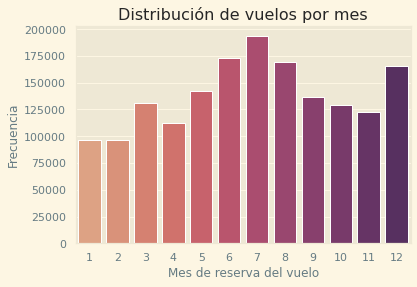

In [132]:
#1. Distribución de la cantidad de vuelos reservados por mes durante todo el año

#a. Creo un DF de los vuelos reservados agrupados por mes
df_mes = df_final.groupby("month")["flights_booked"].sum().reset_index()

#b. Creo el gráfico
sns.barplot(x="month", y="flights_booked", data=df_mes, palette = "flare")
plt.title("Distribución de vuelos por mes")
plt.xlabel("Mes de reserva del vuelo")
plt.ylabel("Frecuencia");

#c. Interpretación: julio, junio y diciembre son los meses con mayor número de reservas de vuelos de los clientes

In [175]:
# 2. Relación entre la distancia de los vuelos y los puntos acumulados por los clientes
# a. Creo df agrupado
df_distancia = df_final.groupby("loyalty_number")[["distance","points_accumulated"]].mean()
df_distancia.head(2)


,distance,points_accumulated
loyalty_number,,
100018,2534.1,268.800000
100102,2366.0,242.073529


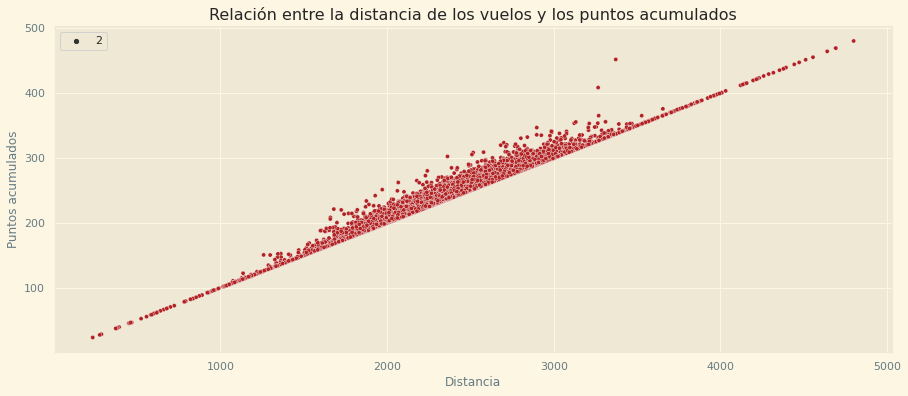

In [173]:
#b. Creo gráfico
plt.figure(figsize = (15, 6))
sns.scatterplot(x = "distance", y = "points_accumulated", data = df_distancia, color="firebrick", size=2)
plt.title("Relación entre la distancia de los vuelos y los puntos acumulados")
plt.xlabel("Distancia")
plt.ylabel("Puntos acumulados");

#c. Interpretación: El gráfico muestra una relación positiva entre la distancia y puntos acumulados -- a más productos acumulados, mayor es la distancia de los vuelos de los clientes

In [195]:
#3. Distribución de los clientes por provincia o estado

#a. Creo el DF agrupado
df_provestado = df_final.groupby(["province","city"])["loyalty_number"].nunique().reset_index() #utilizo nunique para que me cuente los valores de clientes/loyalty_numbers únicos
df_provestado.head(3)

,province,city,loyalty_number
0,Alberta,Banff,159
1,Alberta,Calgary,173
2,Alberta,Edmonton,446


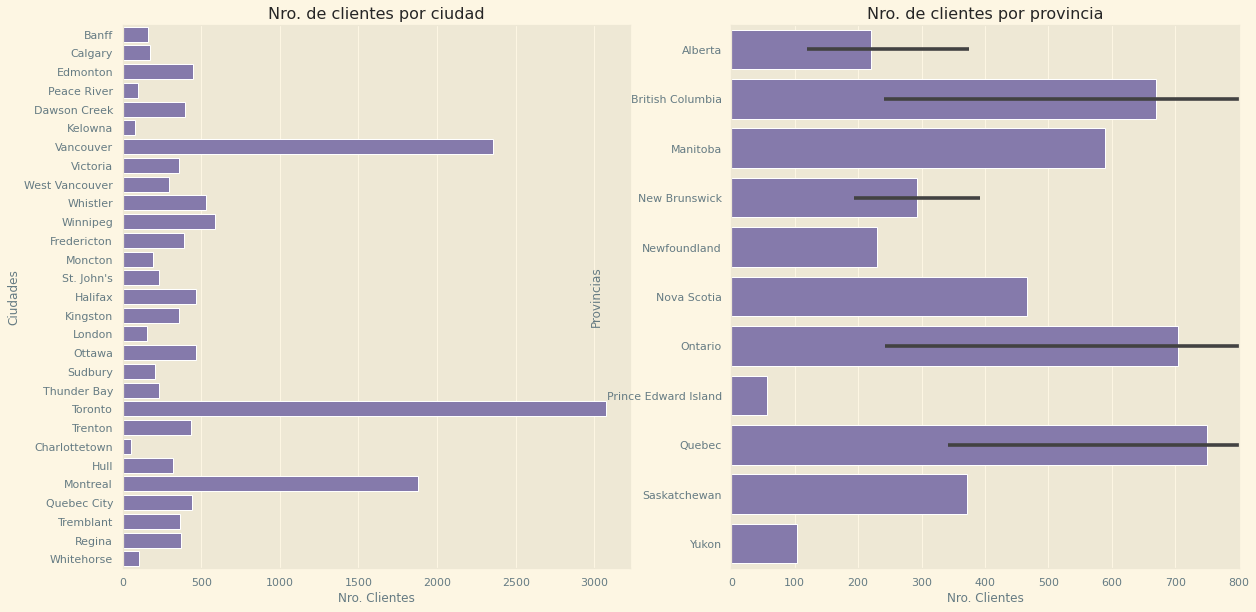

In [206]:
#b. Crear gráfico
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10))
axes = axes.flat
sns.barplot(y ="city", x = "loyalty_number", data = df_provestado, ax = axes[0], color= "m")
sns.barplot(y ="province", x = "loyalty_number", data = df_provestado, ax = axes[1], color= "m")
axes[0].set_xlabel("Nro. Clientes")
axes[1].set_xlabel("Nro. Clientes")
axes[1].set_xlim([0, 800]) #Para establecer el límite del xaxis del segundo gráfico
axes[0].set_ylabel("Ciudades")
axes[1].set_ylabel("Provincias")
axes[0].set_title("Nro. de clientes por ciudad")
axes[1].set_title("Nro. de clientes por provincia");  

#c. Interpretación: Las provincias con mayor número de clientes son Quebec, Ontario y British Columbia
#   y las ciudades con mayor número de clientes son Toronto, Vancouver y Montreal

In [223]:
#4. Comparación entre el salario promedio y los diferentes niveles educativos de los clientes

# a. Creamos el DF agrupado
df_educación = df_final.groupby(["loyalty_number","education"])["salary"].mean().reset_index()
display(df_educación.head())
print(df_educación.shape)

,loyalty_number,education,salary
0,100018,Bachelor,92552.000000
1,100102,College,79690.113745
2,100140,College,79690.113745
3,100214,Bachelor,63253.000000
4,100272,Bachelor,91163.000000


(15236, 3)


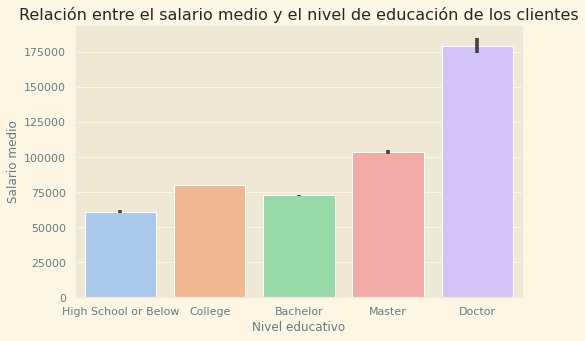

In [287]:
#b. Creo gráfico
plt.figure(figsize = (8, 5))
sns.barplot(y = "salary", x = "education", data = df_educación, palette="pastel", order = ["High School or Below", 'College', 'Bachelor', 'Master', 'Doctor'])
plt.title("Relación entre el salario medio y el nivel de educación de los clientes")
plt.xlabel("Nivel educativo")
plt.ylabel("Salario medio");

#c. Interpretación: Si bien en general existe una relación directa entre el nivel educativo y el salario (a mayor nivel educativo, el salario medio de los clientes es mayor), en el caso del diploma de college que es un diploya profesional (similar a nuestra FP), muestra que los clientes con este nivel educativo tienen un salario medio superior al universitario de Bachelor

In [239]:
#5. Proporción de clientes con diferentes tipos de tarjetas de fidelidad

# a. Creamos el DF agrupado por tipo de tarjeta 
df_tarjeta = df_final.groupby("loyalty_card")["loyalty_number"].nunique().reset_index()
df_tarjeta

,loyalty_card,loyalty_number
0,Aurora,3112
1,Nova,5151
2,Star,6973


In [246]:
denominador = df_final["loyalty_number"].nunique()
denominador

15236

In [253]:
#b. Cálculo de proporciones

aurora = df_tarjeta.iloc[0,1] / denominador
nova = df_tarjeta.iloc[1,1] / denominador
star = df_tarjeta.iloc[2,1] / denominador

print(f"La proporción de la tarjeta Aurora es de {np.round(aurora,3)}%")
print(f"La proporción de la tarjeta Nova es de {np.round(nova,3)}%")
print(f"La proporción de la tarjeta Star es de {np.round(star,3)}%")

La proporción de la tarjeta Aurora es de 0.204%
La proporción de la tarjeta Nova es de 0.338%
La proporción de la tarjeta Star es de 0.458%


In [266]:
#c. Creo un diccionario
dic_tarjeta={"Tarjetas": ["Aurora","Nova","Star"], "Valores" : [0.204, 0.338,0.458]}
df_tarjeta = pd.DataFrame(dic_tarjeta)
df_tarjeta

,Tarjetas,Valores
0,Aurora,0.204
1,Nova,0.338
2,Star,0.458


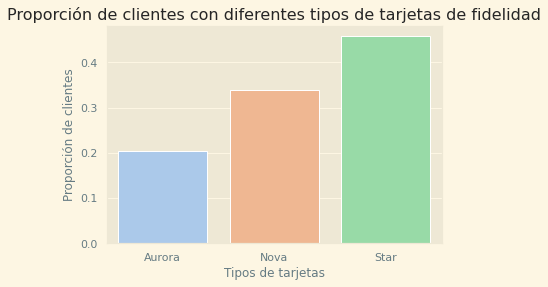

In [269]:
#d. Gráfico
sns.barplot(x="Tarjetas", y="Valores", data=df_tarjeta, palette="pastel")
plt.title("Proporción de clientes con diferentes tipos de tarjetas de fidelidad")
plt.xlabel("Tipos de tarjetas")
plt.ylabel("Proporción de clientes");

#e. Interpretación: Las tarjetas más comunes de nuestros clientes es la "Star"

In [282]:
#6. Distribución de clientes según su estado civil y género

#a. Creo el DF agrupado
df_gro_civil = df_final.groupby(["gender","marital_status"])["loyalty_number"].nunique().reset_index() #utilizo nunique para que me cuente los valores de clientes/loyalty_numbers únicos
df_gro_civil

,gender,marital_status,loyalty_number
0,Female,Divorced,1154
1,Female,Married,4401
2,Female,Single,2073
3,Male,Divorced,1151
4,Male,Married,4423
5,Male,Single,2034


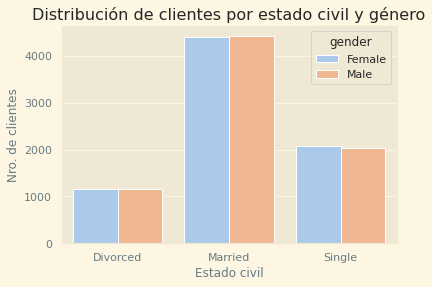

In [285]:
#b. Gráfico
sns.barplot(x="marital_status", y="loyalty_number", hue="gender", data=df_gro_civil, palette="pastel")
plt.title("Distribución de clientes por estado civil y género")
plt.xlabel("Estado civil")
plt.ylabel("Nro. de clientes");

#c. Interpretación: Vemos que existe una distribución casi idéntica del estado civil tanto en las clientas como en los clientes

### Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo
Objetivo del Ejercicio: Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:
1. Preparación de Datos:
Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

2. Análisis Descriptivo:
Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.

3. Prueba Estadística:
Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos

In [295]:
#1. División en 2 grupos según su nivel educativo

#a. Veo los niveles educativos q hay en la base de datos
print("Niveles educativos en base de datos:")
print(df_final["education"].value_counts()) 
print("________________________________________________")

#b. Creo la función para diviidr los niveles en 2 grupos
def educacion_cat (valor):
    if valor == "High School or Below" or valor == "College":
        return "basic_education"
    else: 
        return "high_education"
    
#c. Creo una columna con la división de los niveles en el paso b
df_final["groups"] = df_final["education"].apply(educacion_cat)

#d. Verifico que la división está acorde con los niveles educativos en la base de datos (punto a)
print("La división en los 2 grupos es:")
print(df_final["groups"].value_counts())

Niveles educativos en base de datos:
Bachelor                129303
College                  52834
High School or Below      9855
Doctor                    9193
Master                    6447
Name: education, dtype: int64
________________________________________________
La división en los 2 grupos es:
high_education     144943
basic_education     62689
Name: groups, dtype: int64


In [315]:
#2. Análisis descriptivo del número de vuelos reservados

#a. División del df en 2 grupos deacuerdo a la columna creada en el punto 1
grupo_control = df_final[df_final["groups"] == "high_education"]
grupo_test = df_final[df_final["groups"] == "basic_education"]

#b. Cálculo de estadísticas 

#--> Para el grupo de control
print ("Estadísticas para el grupo de control (educación elevada):")
print(grupo_control["flights_booked"].describe())
print ("__________________")

#--> Para el grupo de control
print ("Estadísticas para el grupo de test (educación básica):")
print(grupo_test["flights_booked"].describe())

#c. Interpretación: Las medias de ambos grupos en el número de vuelos reservados es similar (aprox. 8 vuelos)


Estadísticas para el grupo de control (educación elevada):
count    144943.000000
mean          8.029177
std           4.668654
min           1.000000
25%           4.000000
50%           8.000000
75%          11.000000
max          21.000000
Name: flights_booked, dtype: float64
__________________
Estadísticas para el grupo de test (educación básica):
count    62689.000000
mean         8.061877
std          4.669584
min          1.000000
25%          4.000000
50%          8.000000
75%         11.000000
max         21.000000
Name: flights_booked, dtype: float64


In [327]:
#3. Prueba estadística

#a. Primero tenemos que ver si nuestra métrica (vuelos reservados) es normal, la homogeneidad de varianzas e independencia

#--> Calculamos la normalidad (con Kolmogrov, puesto que el tamaño de nuestros grupos es superior a 5,000)
p_value = kstest(df_final["flights_booked"], "norm").pvalue
print(p_value)
alpha = 0.05
if p_value > alpha:
    print("Los datos se ajustan a una distribución normal (p-value =", p_value, ")")
else:
    print("Los datos no se ajustan a una distribución normal (p-value =", p_value, ")")

print("____________________")

#b. Resultado sobre la normalidad: Puesto que nuestra mética (flights_booked) no siguen una distribución normal, no necesitamos continuar verificando la homogeneidad e independicia y directamente podemos calcular el t-test no paramétrico (ManWhitney)

#c. Prueba ManWhitney
#-->Filtramos el grupo de control y test creados en el punto 2 por la métrica de interés ("flights_booked")
control_vuelos = grupo_control["flights_booked"]
test_vuelos = grupo_test["flights_booked"]
#print(len(test_vuelos))
#print(len(control_vuelos))

#2. Realizamos la prueba de ManWhitney para calcular el pvalor
statistic, pvalue = mannwhitneyu(control_vuelos, test_vuelos)
print(f"El pvalor resultante de la prueba MannWhitney es: {pvalue}") 

if pvalue < 0.05:
    print("Para la métrica vuelos reservados, las medias son diferentes.")
else:
    print("Para la métrica vuelos reservados, las medias son iguales.\n")

#3. Interpretación: Puesto q el pvalor es superior a 0.05, no existen evidencias suficientes para rechazar la hipótesis nulas y por tanto podemos afirmar q no existe una diferencia significativa entre las medias de ambos grupos y q por tanto, la media de vuelos reservados no difiere por nivel educativo
print ("CONCLUSIÓN: Puesto q el pvalor es superior a 0.05, no existen evidencias suficientes para rechazar la hipótesis nulas, \n y por tanto podemos afirmar q no existe una diferencia significativa entre las medias de ambos grupos \n y q por tanto, la media de vuelos reservados no difiere por nivel educativo")

0.0
Los datos no se ajustan a una distribución normal (p-value = 0.0 )
____________________
El pvalor resultante de la prueba MannWhitney es: 0.12501068282706929
Para la métrica vuelos reservados, las medias son iguales.

CONCLUSIÓN: Puesto q el pvalor es superior a 0.05, no existen evidencias suficientes para rechazar la hipótesis nulas, 
 y por tanto podemos afirmar q no existe una diferencia significativa entre las medias de ambos grupos 
 y q por tanto, la media de vuelos reservados no difiere por nivel educativo


In [322]:
#Cálculo de la normalidad con Shapiro

def normalidad(dataframe, columna):
    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

normalidad(df_final, "flights_booked")

Para la columna flights_booked los datos no siguen una distribución normal.


/home/elenag/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
